# ANALIZA 500 NAJVREDNEJŠIH PODJETIJ NA TRGU

## Opis in priprava


Predstavil bom podatke, pridobjene tekom dela projektne naloge.

Najprej je potrebno uvoziti določene knjižnjice in podatke iz drugih datotek, da bo program lahko narisal grafe.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urejanje import porazdelitev_sektorjev, porazdelitev_držav, vrednost_države, povprečna_vrednost_sektorja, vrednosti_sektorjev, porazdelitev_industrij
from urejanje import podjetja

Uvozil bom tudi csv v katerem so vsi podatki, da se vidi, kako so urejeni.

In [5]:
podatki = pd.read_csv("podatkiPodjetja.csv")

podatki

,ime,država,kratica,vrednost,sektor,industrija
0,Apple,ZDA,AAPL,2958.00,Tehnologija,Potrošniška elektronika
1,Microsoft,ZDA,MSFT,2537.00,Tehnologija,Programska oprema
2,Aramco,Savdska Arabija,2222,2074.00,Energetika,Nafta in plin
3,Alphabet,ZDA,GOOG,1521.00,Komunikacijske storitve,Internetne vsebine in informacije
4,Amazon,ZDA,AMZN,1321.00,Potrošniške storitve,Internetna maloprodaja
...,...,...,...,...,...,...
495,"Ameriprise Financial, Inc",ZDA,AMP,35.02,Finance,Upravljanje sredstev
496,"Agilent Technologies, Inc",ZDA,A,35.01,Zdravstvo,Diagnostika in raziskave
497,HP Inc,ZDA,HPQ,34.99,Tehnologija,Računalniška strojna oprema
498,Newmont Corporation,ZDA,NEM,34.99,Osnovni materiali,Zlato


### Prikaz deleža top 500 podjetij, za vsako državo
Glede na Ameriški vpliv na vsakdanje življenje, predvidevam, da imajo izjemen vpliv tudi na svetovno gospodarstvo.
To bom preveril v tem delu naloge.

Dodam tabelo s podatki o številu podjetij iz vsake države.

In [7]:
podatki = pd.read_csv("porazdelitev_držav.csv")

podatki

,država,count
0,ZDA,256
1,Kitajska,33
2,Japonska,30
3,Združeno kraljestvo,22
4,Francija,20
...,...,...
27,Avstrija,1
28,Argentina,1
29,Bermuda,1
30,Južna Afrika,1



Pričakoval sem, da bodo Američani prevladovali, a ne za toliko. Dejstvo, da je več kot polovica podjetij iz ZDA, kaže na to, da so v ZDA tako kot v preteklosti, tudi trenutno najboljši pogoji za uspešno poslovanje velikih podjetij. Tukaj je graf ki prikazuje stanje.

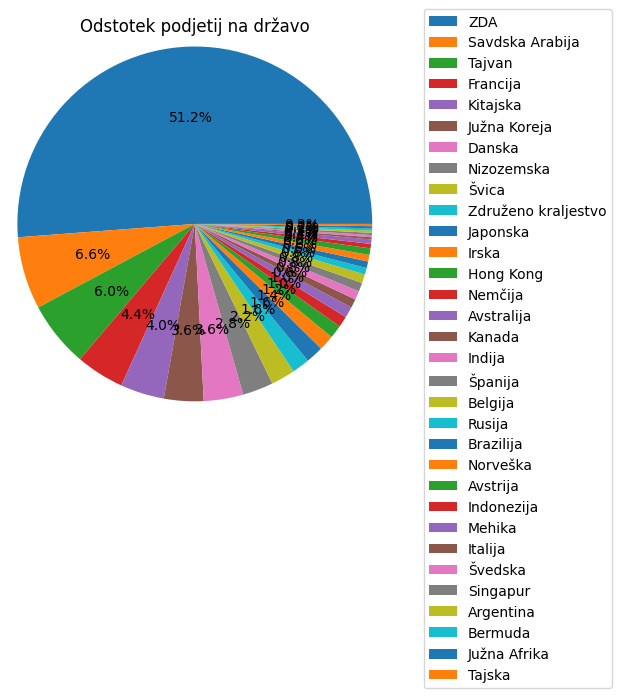

In [8]:
plt.pie(porazdelitev_držav, radius=1.2, autopct="%0.1f%%")
plt.title("Odstotek podjetij na državo")
plt.legend(labels=podjetja.država.unique(), loc='upper left', bbox_to_anchor=(1.1, 1.1))
plt.show()

### Skupna vrednost podjetij vsake države
Dodal bom tudi graf, ki prikazuje skupno vrednost podjetij vsake države. Zaradi boljše preglednosti sem se omejil samo na 10 držav z največjo vrednostjo.
Kot vidimo ZDA prednjačijo še bolj kot v prejšnjem grafu, kar znova potrjuje mojo tezo.

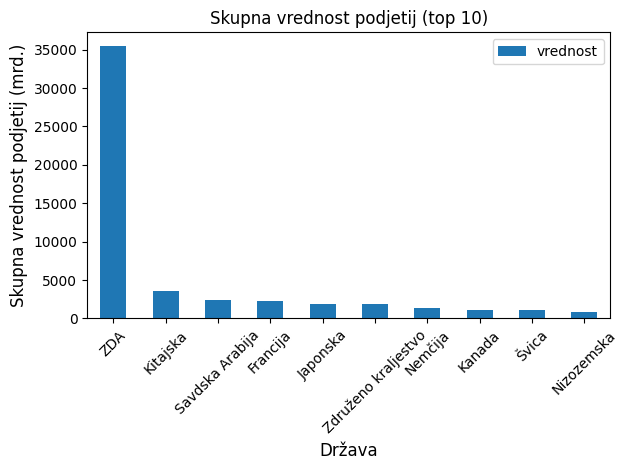

In [9]:
vrednost_države = vrednost_države[:10]
ax = vrednost_države.plot(kind='bar')
ax.set_xlabel('Država', fontsize=12)
ax.set_ylabel('Skupna vrednost podjetij (mrd.)', fontsize=12)
plt.title("Skupna vrednost podjetij (top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Razmerja moči med sektorji
Drug del podatkov za katere sem se zanimal so podatki o sektorjih. Glede na to kako odvisna je moderna družba od tehnologije, sem pričakoval, da bo najštevilčnejši tehnološki sektor, a temu ni tako.

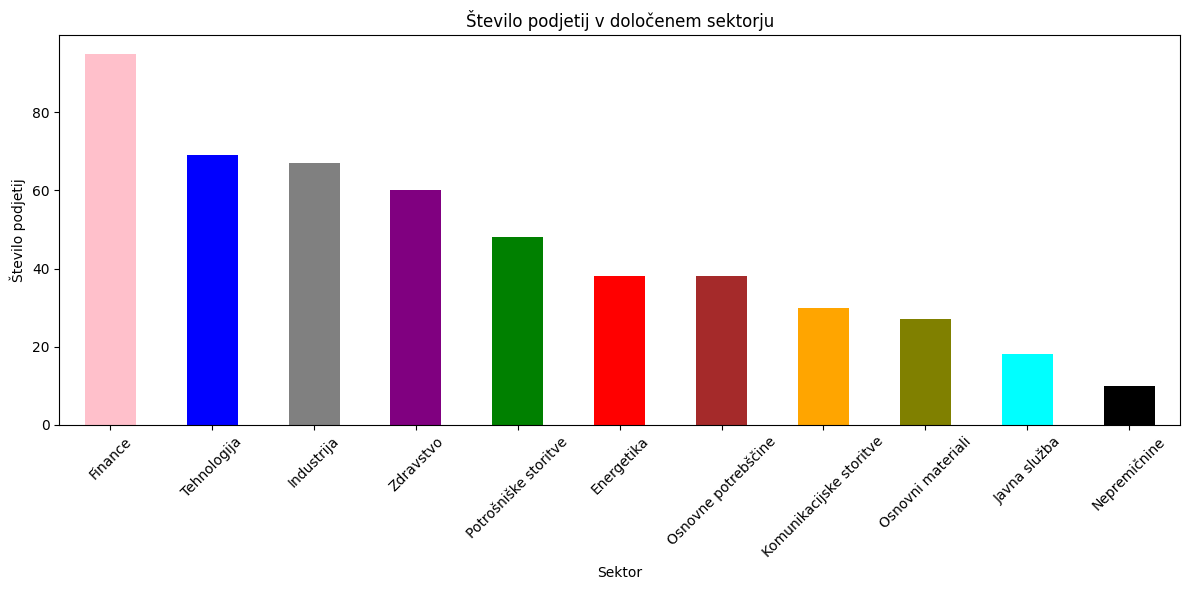

In [ ]:


plt.figure(figsize=(12, 6))
porazdelitev_sektorjev.plot(kind='bar', color=["pink", "blue", "grey", "purple", "green", "red", "brown", "orange", "olive", "cyan", "black"])
plt.title("Število podjetij v določenem sektorju")
plt.xlabel("Sektor")
plt.ylabel("Število podjetij")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ta graf pa predstavlja skupno vrednost vsakega sektorja. Vidimo, da je tehnološki  sektor skoraj tretjino večji od druga največjega, torej od finančnega.


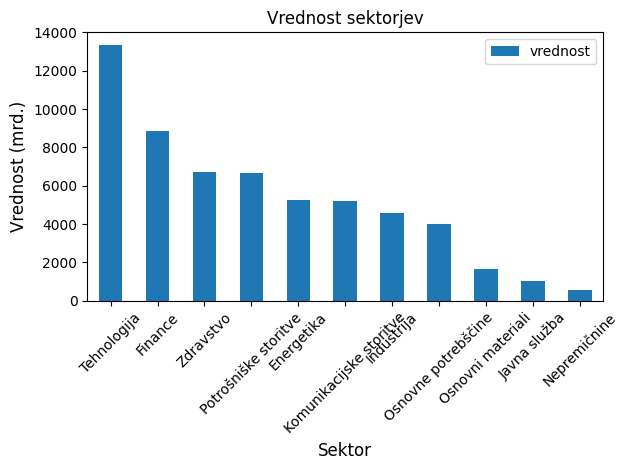

In [10]:
ax = vrednosti_sektorjev.plot(kind='bar')
ax.set_xlabel('Sektor', fontsize=12)
ax.set_ylabel('Vrednost (mrd.)', fontsize=12)
plt.title("Vrednost sektorjev")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Zanimivi se mi zdijo podatki iz sledečega grafa, v katerem so prikazane povprečne vrednosti podjetij vsakega sektorja. Nepresenetjivo je tehnologija še vedno na prvem mestu, lahko pa opazimo, da sta komunikacijske in potrošniške storitve visoko na lestvici, finance pa so izgubile veliko mest. Nizek položaj financ pripisujem veliki raznolikosti v tem sektorju, kar povzroči, da se podjetje pogosto omeji zgolj na eno poslovno nišo in s tem omeji potencialno velikost firme. Mislim, da so razlog za drugo mesto komunikacijskih storitev predvsem tehnološki velikani, kot sta Google in Meta, ki pogosto kupijo rivalska podjetja in si jih pridružijo, kar poveča njihovo vrednost in zmanjša število podjetij. Posledica tega je zelo visoko povprečje  v sektorju.

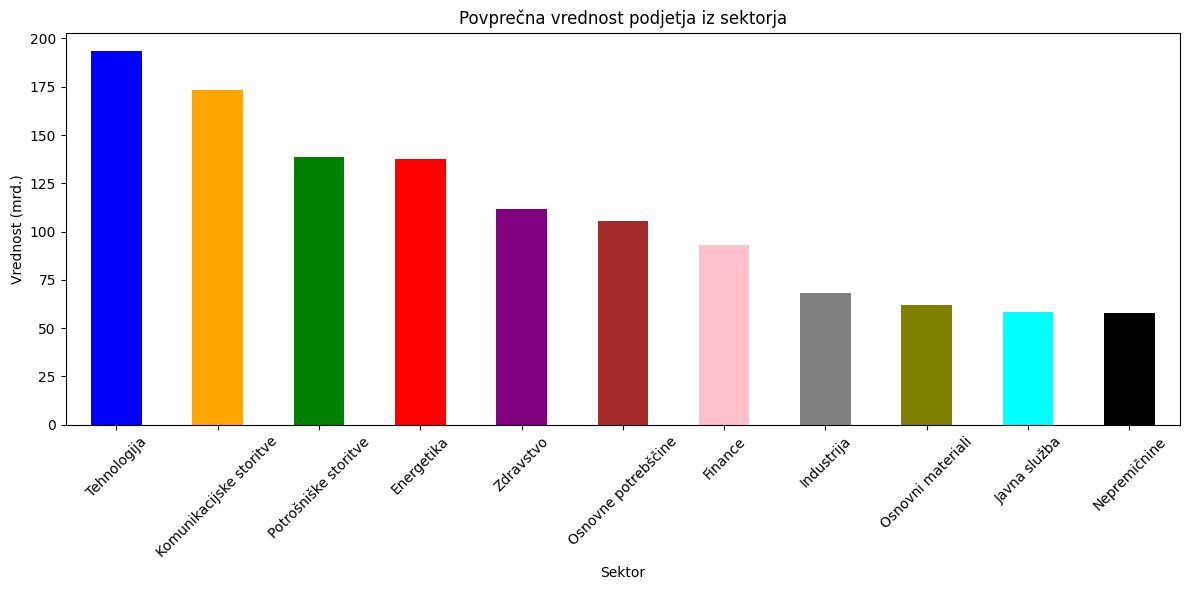

In [12]:
plt.figure(figsize=(12, 6))
povprečna_vrednost_sektorja.plot(kind='bar', color=["blue", "orange", "green", "red", "purple", "brown", "pink", "grey", "olive", "cyan", "black"])
plt.title("Povprečna vrednost podjetja iz sektorja")
plt.xlabel("Sektor")
plt.ylabel("Vrednost (mrd.)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Industrije (top 15)
Dodajam tudi graf 15 največjih industrij po številu podjetij. Ker se sorodne inustrije "spakirajo" v sektor, lahko vidimo povezavo med tem grafom in pa grafom ki prikazuje število podjetij v določenem sektorju. 

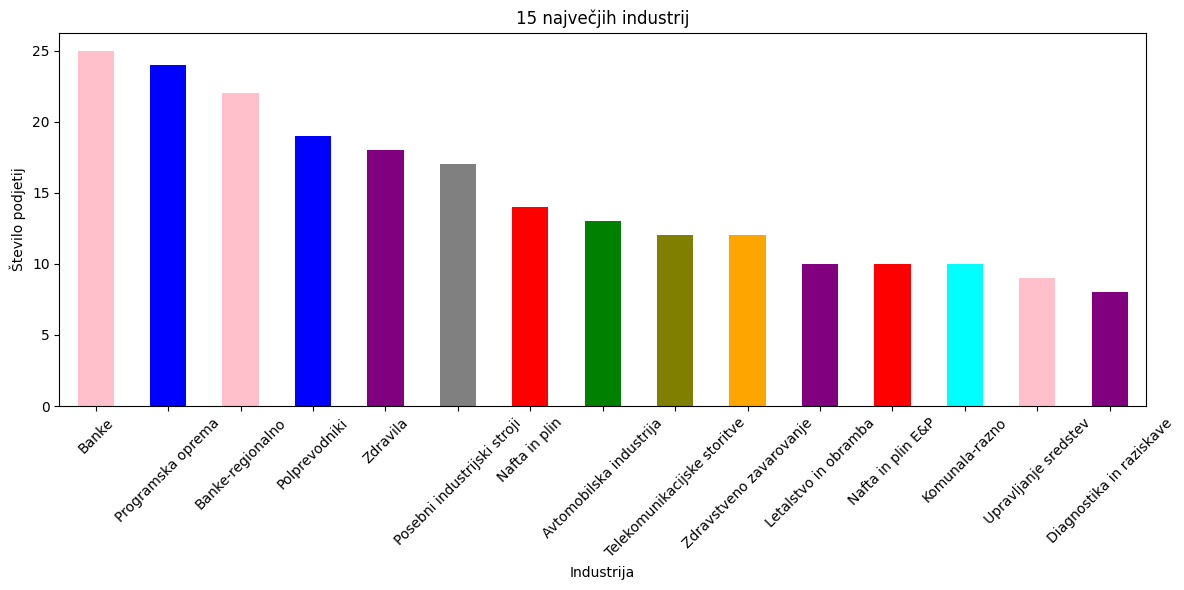

In [26]:
plt.figure(figsize=(12, 6))
porazdelitev_industrij = porazdelitev_industrij[:15]
porazdelitev_industrij.plot(kind='bar', color=["pink", "blue", "pink", "blue", "purple", "grey", "red", "green", "olive", "orange", "purple", "red", "cyan", "pink", "purple"])
plt.title("15 največjih industrij")
plt.xlabel("Industrija")
plt.ylabel("Število podjetij")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Izstopanja
Šel sem že čez povprečja in vsote pri sektorjih, zdaj pa me zanima še, kje podjetja najbolj izstopajo. V financah, zdravstvu, osnovnih potrebščinah, osnovnih materialih, industriji, javni službi in nepremičninah nihče ne izstopa iz povprečja.
Če pobrskamo po podatkih v csv-ju pa vidimo sledeče izjeme:
- Tehnologija (Apple, Microsoft, Nvidia)
- Energetika (Aramco)
- Komunikacijske storitve (Alphabet(Google), Meta)
- Potrošniške storitve (Amazon, Tesla)
- Finance (Berkshire Hathaway)


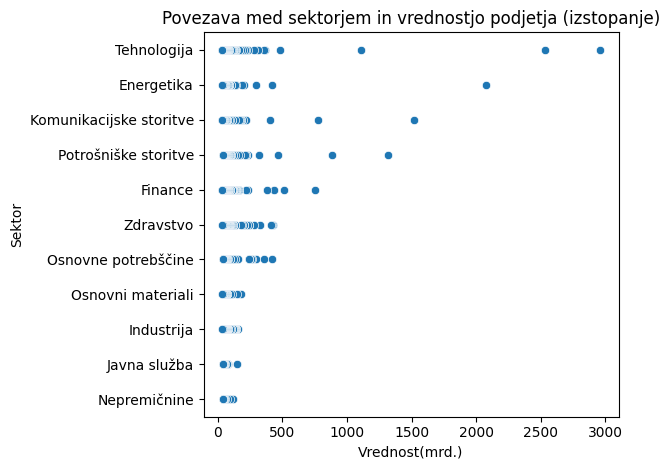

In [28]:
sns.scatterplot(data=podjetja, x='vrednost', y='sektor')
plt.title("Povezava med sektorjem in vrednostjo podjetja (izstopanje)")
plt.xlabel("Vrednost(mrd.)")
plt.ylabel("Sektor")
plt.tight_layout()
plt.show()

### Porazdelitev po vrednosti
Za konec bom pogledal še, kakšna je razlika med velikani v poslovnem svetu in pa manjšimi podjetji, vrednimi komaj nekaj deset milijard. Kot vidimo, so podjetja porazdeljena izredno neenakomerno, kar pomeni, da peščica, ki ima primat na trgu nadzira večino denarja.

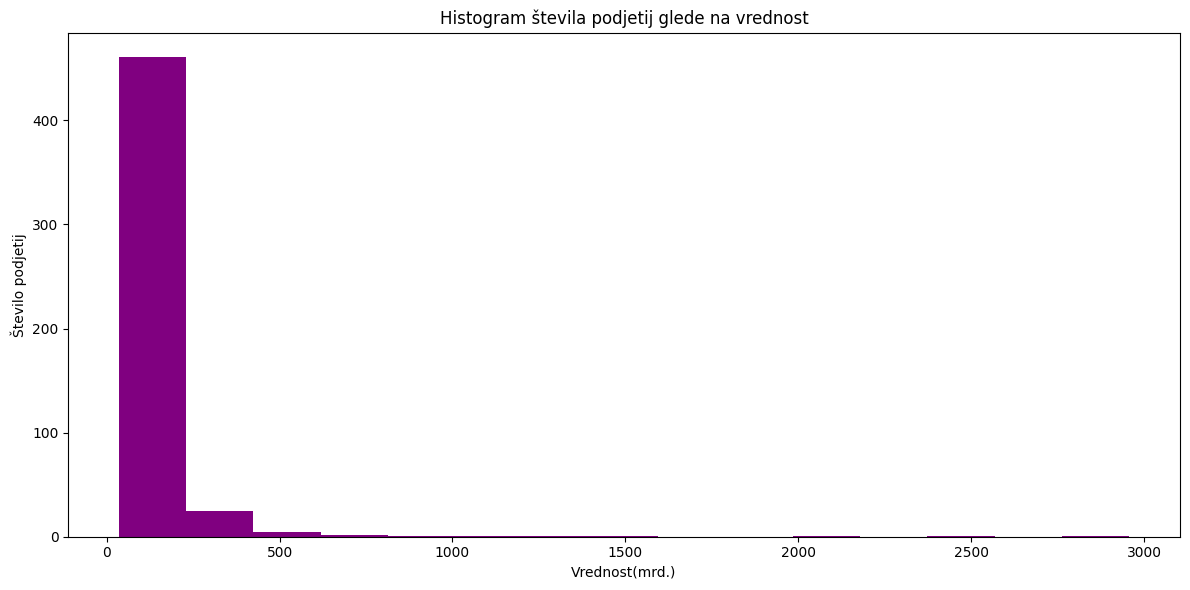

In [30]:
plt.figure(figsize=(12, 6))
plt.hist(podjetja['vrednost'], bins=15, color=["purple"])
plt.title("Histogram števila podjetij glede na vrednost")
plt.xlabel("Vrednost(mrd.)")
plt.ylabel("Število podjetij")
plt.tight_layout()
plt.show()

### Zaključek
Lestvico najvrednejših sestavljajo nekatera izmed najbolj znanih podjetij na svetu. Številna so del relativno novih in hitro rastočih sektorjev, mnogo pa jih je tudi iz starejših in bolj uveljavljenih sektorjev. Vsa so izjemno pomembna za svetovno gospodarstvo, saj ustvarjajo ogromno delovnih mest, prav tako pa lahko s pomočjo njihovih izdelkov in storitev mnogokdo ustvari svoj posel, kar še bolj poganja gospodarstvo. Če bosta kapitalizem in neoliberalizem ostala prevladujoča sistema tudi v prihodnosti, bodo vrednosti podjetij šle samo navzgor.